Tutorial by Sebastian Raschka "Principal Component Analysis in 3 Simple Steps"  
published 1/27/2015  

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()


,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# split data table into data X and class labels y
# NOTE ix --> iloc
X = df.iloc[:,0:4].values  # features
y = df.iloc[:,4].values    # labels


# Exploratory vis

In [51]:
from matplotlib import pyplot as plt
import numpy as np
import math

# grab strings directly from df metadata to avoid problems
# when scipy changes their names again... 
labels = list(set(df['class'].values))
features = list(df.columns)
features.remove('class')
features = [f"{s} [cm]" for s in features]

print(f"labels = {labels}")
print(f"features = {features}")

labels = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
features = ['sepal_len [cm]', 'sepal_wid [cm]', 'petal_len [cm]', 'petal_wid [cm]']


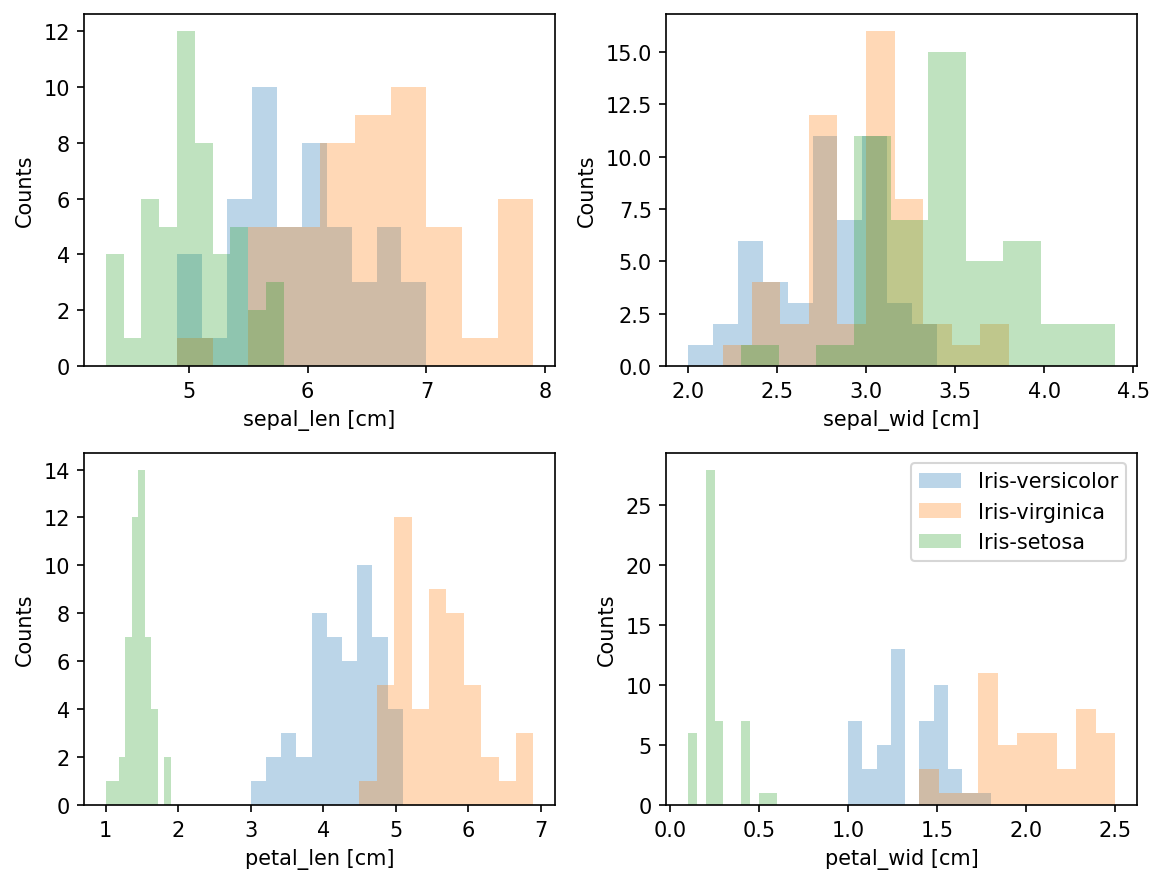

In [58]:
fig, axs = plt.subplots(2, 2, figsize=[8, 6], dpi=150)
axs = axs.flatten()

for ax, (i_feat, feature) in zip(axs, enumerate(features)):
    for label in labels:
        ax.hist(X[y==label, i_feat], 
                label=label,
                bins=10,
                alpha=0.3)
        ax.set_xlabel(feature)
        ax.set_ylabel('Counts')
#
axs[-1].legend()
plt.tight_layout()
plt.show()

# Standardizing

In [59]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [60]:
mean_vec = np.mean(X_std, axis=0)
num_samples = X_std.shape[0] - 1
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / num_samples
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [61]:
cov_mat = np.cov(X_std.T)

In [96]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

order = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[order]
eig_vecs = eig_vecs[:, order]

for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [64]:
corr_mat = np.corrcoef(X.T)
print(np.shape(X.T))

e_corr, v_corr = np.linalg.eig(corr_mat)

(4, 150)


# SVD

In [65]:
u,s,v = np.linalg.svd(X_std.T)

# Removing eigenvectors

In [67]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589313
0.9274036215173417
0.1483422264816399
0.020746013995595784


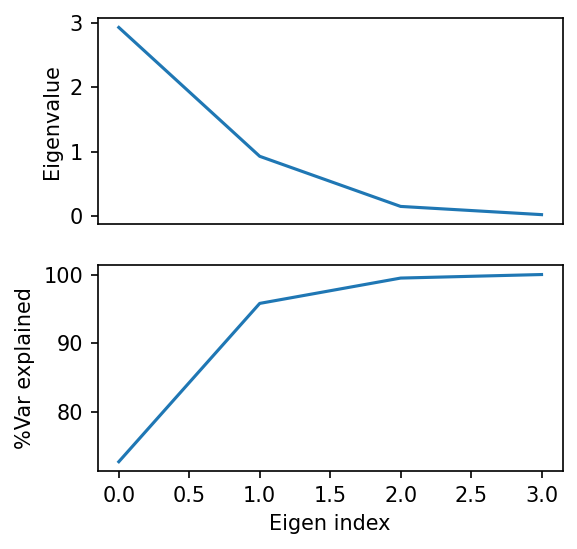

In [71]:
fig, (ax_e, ax_cum) = plt.subplots(2,1, figsize=[4, 4], dpi=150)
ax_e.plot(eig_vals)
ax_e.set_xticks([])
var_exp = np.cumsum(eig_vals) / np.sum(eig_vals)
ax_cum.plot(var_exp * 100)

ax_cum.set_xlabel('Eigen index')
ax_e.set_ylabel('Eigenvalue')
ax_cum.set_ylabel('%Var explained')

plt.show()

# Projection matrix

In [72]:
num_eigen = 2
matrix_w = eig_vecs[:, 0:num_eigen]

In [78]:
Yp = X_std.dot(matrix_w)

In [81]:
labels

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

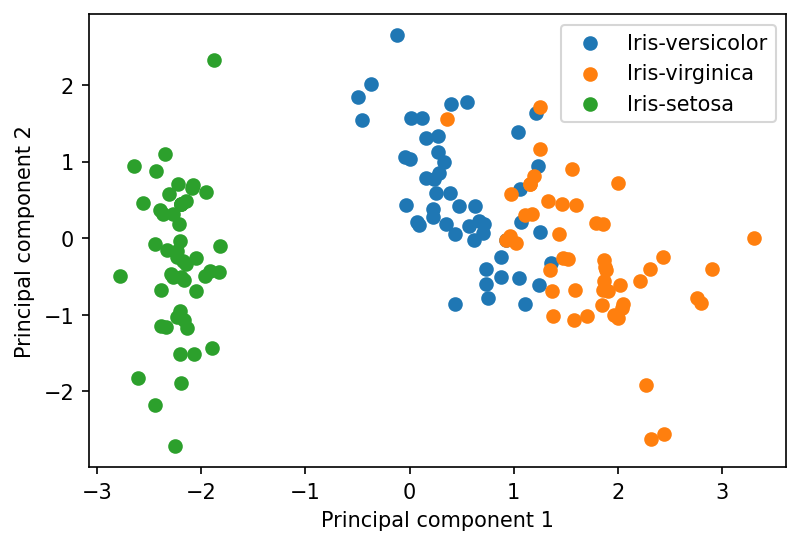

In [86]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=150)
for label in labels:
    ind = (y==label)  # Boolean array
    ax.scatter(Yp[ind,0], Yp[ind,1], label=label)
#
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.legend()
plt.show()

# Scikit-learn

In [97]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [98]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [100]:
print(f"labels = {labels}")
print(f"features = {features}")

labels = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
features = ['sepal_len [cm]', 'sepal_wid [cm]', 'petal_len [cm]', 'petal_wid [cm]']


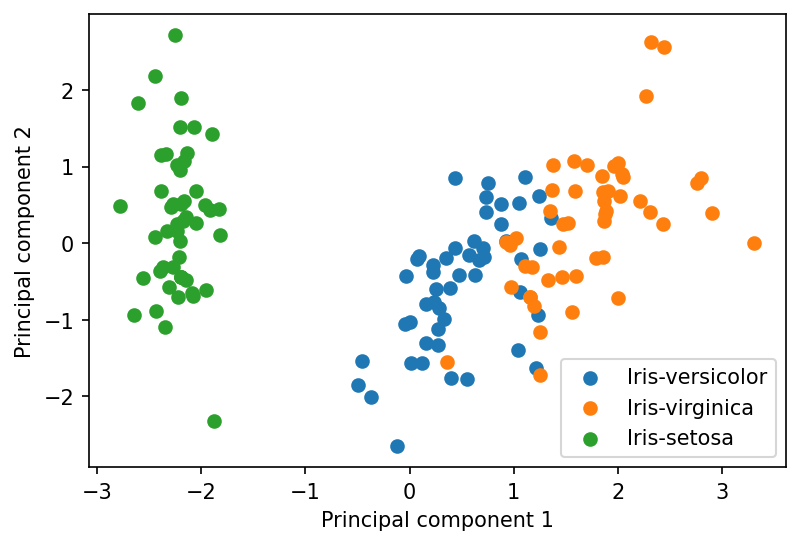

In [107]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=150)
for label in labels:
    ax.scatter(Y_sklearn[y==label, 0],
               Y_sklearn[y==label, 1],
               label=label)
#
ax.legend()
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.show()